# Baseball Case Study
Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

# Import modules

In [2]:
#Generic
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import zscore,normaltest

#Preprocess
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer

#TrainTestSplit
from sklearn.model_selection import train_test_split,cross_val_score

#Models
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor

#Optimize
from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

#Joblib
import joblib

%matplotlib inline

# Loading the dataset

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
df.shape

(30, 17)

In [5]:
#statistical information
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [6]:
# datatype of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


# Preprocessing the dataset

In [7]:
# lets check for missing values.
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<AxesSubplot:>

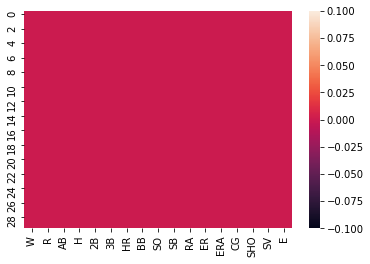

In [8]:
#lets create heatmat for visualizing missing values

sns.heatmap(df.isnull())

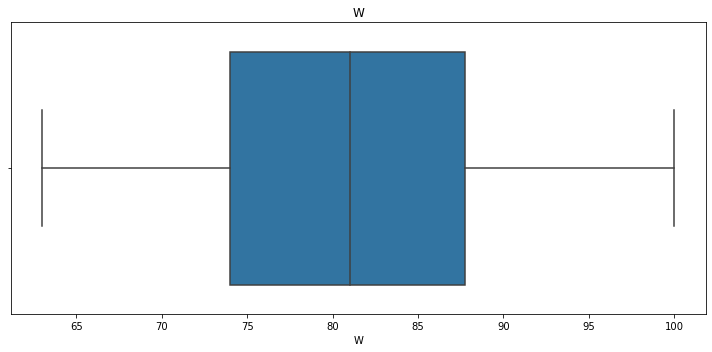

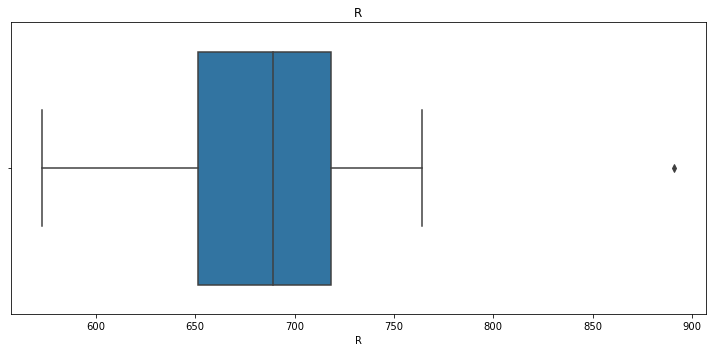

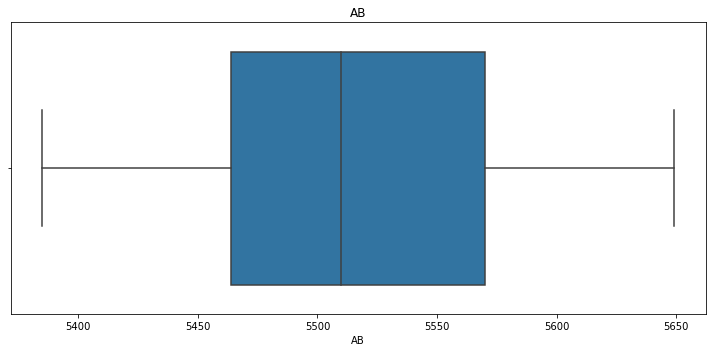

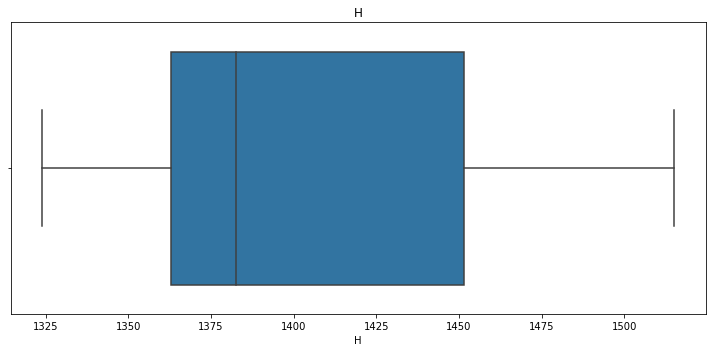

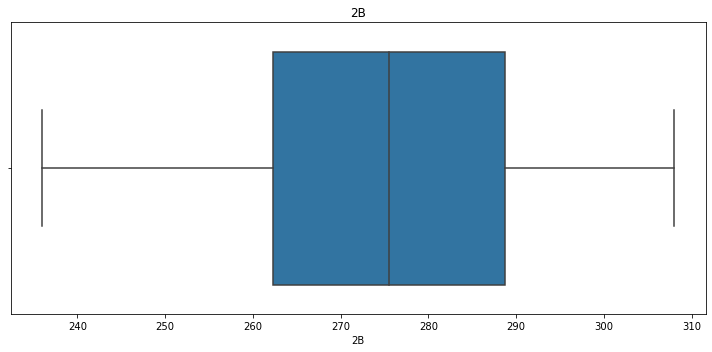

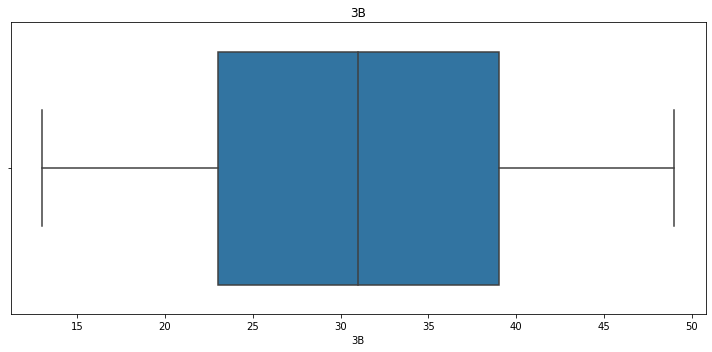

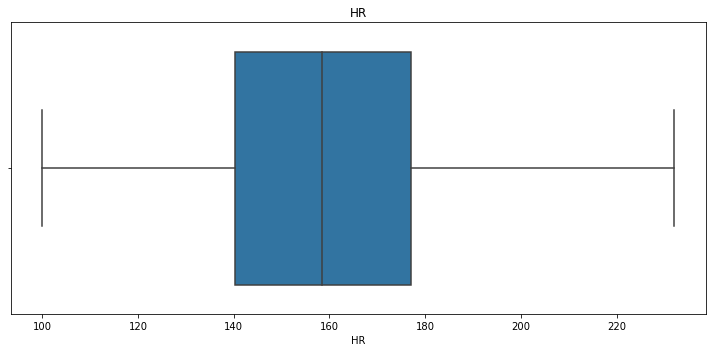

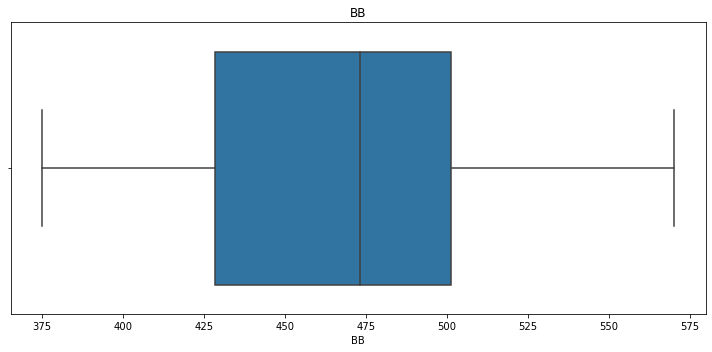

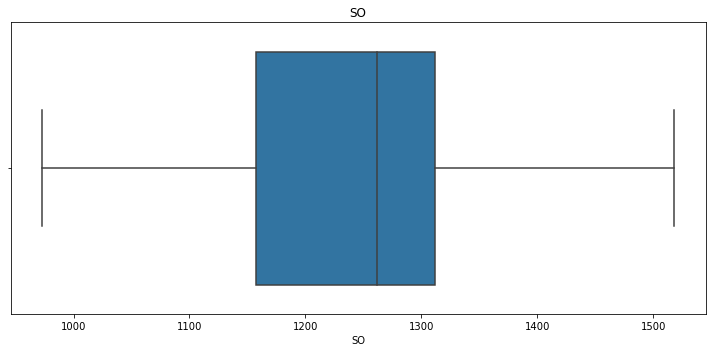

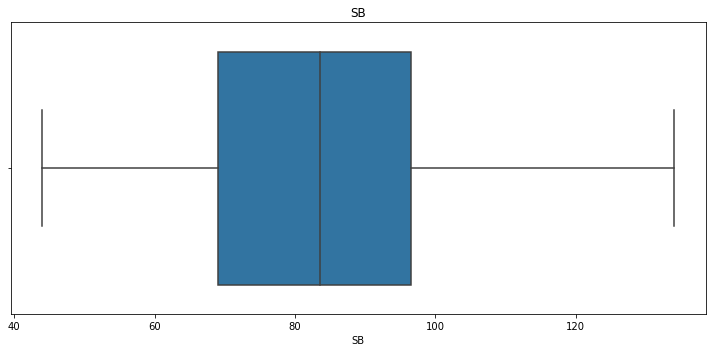

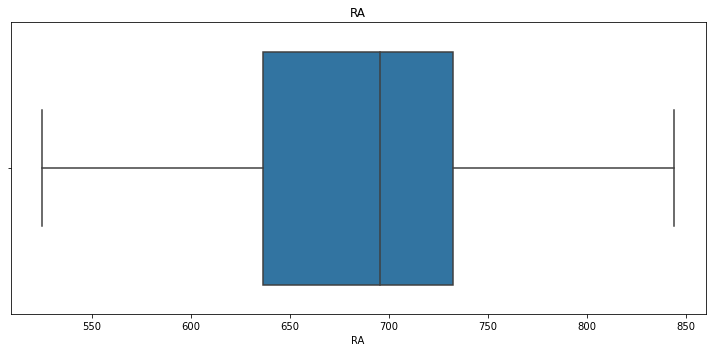

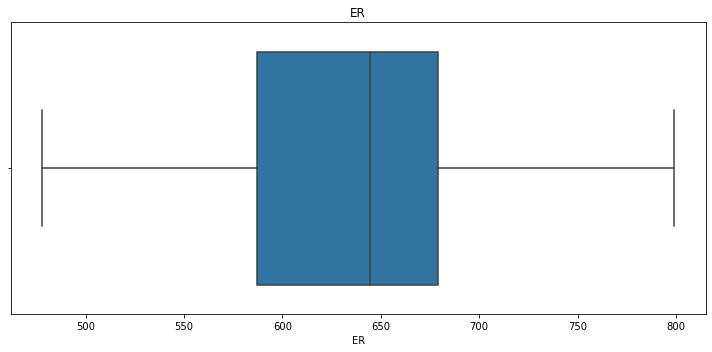

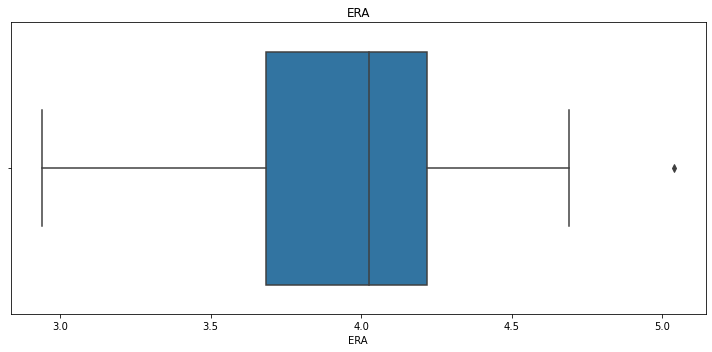

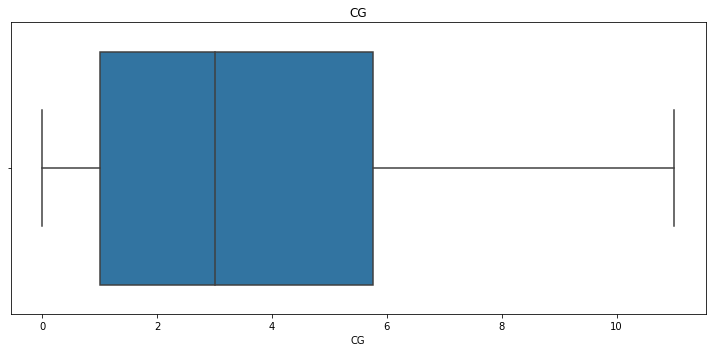

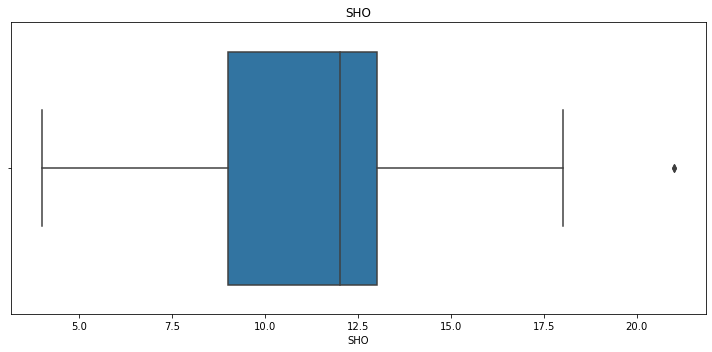

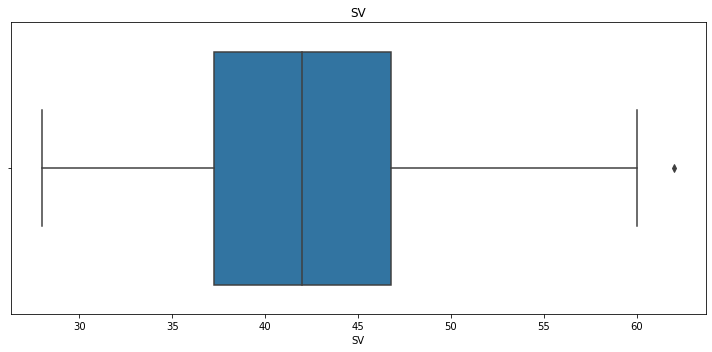

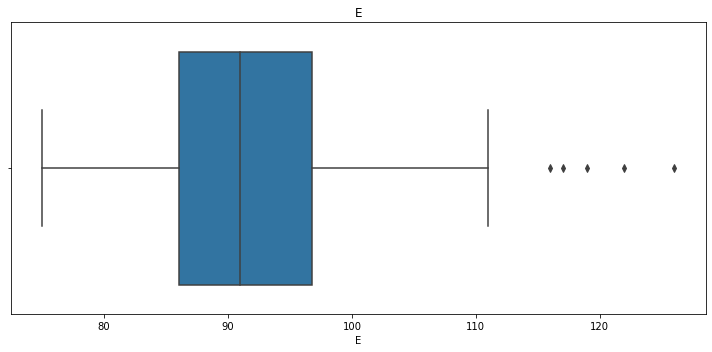

In [17]:
for col in df.columns:
   
    plt.figure(figsize=(10,5))
    plt1 = sns.boxplot(df[col])
    plt.title(col)
    

There are some outliers, we need to treat them to get better model

# Exploratory Data Analysis

In [9]:
#Since there are no null values check correlation of data
df.corr().loc['W'].drop('W').sort_values(ascending=False)
#We can see that there is much correlation of W with SV,ER,RA,ERA

SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64

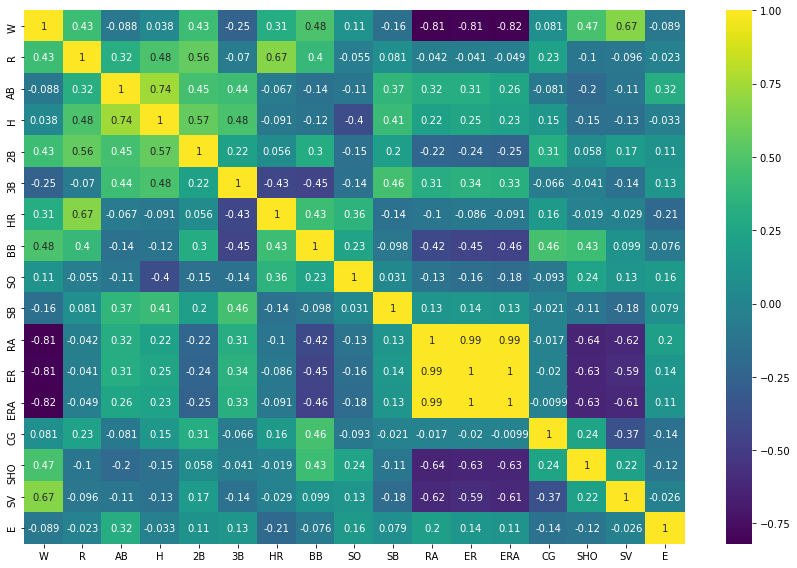

In [11]:
#Lets check it with Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='viridis',annot=True)
plt.tight_layout()
plt.show()
#We can see that ER-ERA are highly correlated

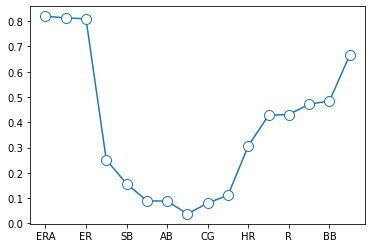

In [12]:
#plot highly correlated values with w
abs(df.corr().loc['W'].drop('W').sort_values()).plot(marker='o',markerfacecolor='white',markersize=10)
plt.show()

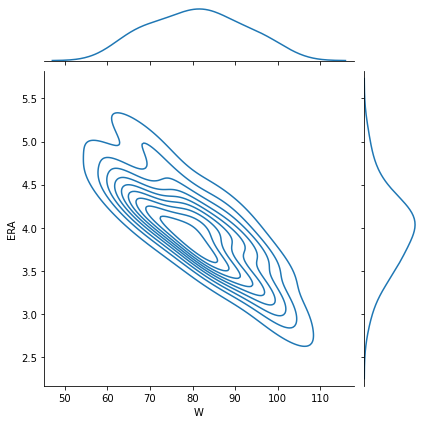

In [13]:
#There is linear relation between W and ERA column
sns.jointplot(x='W',y='ERA',data=df,kind='kde')
plt.show()

# Removing Outliers

In [14]:
#Remove outliers
zs=zscore(df)
df=df[(zs<3).all(axis=1)]

In [15]:
df.shape

(29, 17)

In [16]:
#Check skewness
abs(df.skew())>0.55
#Data is skewed

W      False
R      False
AB     False
H       True
2B     False
3B     False
HR     False
BB     False
SO     False
SB     False
RA     False
ER     False
ERA    False
CG      True
SHO    False
SV      True
E       True
dtype: bool

In [17]:
#Use log1p to correct skewed data
for cols in df.columns:
    if abs(df.loc[:,cols].skew())>0.55:
        df.loc[:,cols]=np.log1p(df.loc[:,cols])

In [18]:
#Check skewness
abs(df.skew())>0.55
#Data is still skewed so we will use powertransformer

W      False
R      False
AB     False
H       True
2B     False
3B     False
HR     False
BB     False
SO     False
SB     False
RA     False
ER     False
ERA    False
CG     False
SHO    False
SV     False
E       True
dtype: bool

In [19]:
pt=PowerTransformer()

In [20]:
#Use Powertransformer (yeojohnson method) to correct skewed data
for cols in df.columns:
    if abs(df.loc[:,cols].skew())>0.55:
        df.loc[:,cols]=pt.fit_transform(df.loc[:,cols].values.reshape(-1,1))

In [22]:
k,p=normaltest(df)
print(k.mean())
print(p.mean())
#As the p value is greater than 0.05 we can conclude that the data is not normalized
#therefore we will use MinMaxscaler

1.2693024394406538
0.5895805082378739


In [24]:
#Scale data
sc=MinMaxScaler()
df_features=df.drop('W',axis=1)
df_target=df.loc[:,'W']
df_features=sc.fit_transform(df_features)
#We have scale only features as we would always like to normalize multi-dimensional data 
#and target would always be 1 dimensional

# Train Test Split

In [32]:
#Define a function to try different train test folds
def model_select(model):
    max_score=0
    max_state=0
    for x in range(42,105):
        X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.33, random_state=x)
        md=model()
        md.fit(X_train,y_train)
        predict=md.predict(X_test)
        r2score=r2_score(y_test,predict)
        if r2score>max_score:
            max_score=r2score
            max_state=x
    print("Max score is {} with random state {}".format(max_score,max_state))

In [33]:
#Call the function for linear regression
model_select(LinearRegression)

Max score is 0.7845463190918573 with random state 59


In [34]:
#Call the function for ElasticNet
model_select(ElasticNet)

Max score is 0.4065805232748808 with random state 46


In [35]:
#Call the function Ridge
model_select(Ridge)

Max score is 0.8241188250212563 with random state 59


In [36]:
#Call the function Lasso
model_select(Lasso)

Max score is 0.6399010892719161 with random state 54


In [37]:
#Call the function KNeighborsRegressor
model_select(KNeighborsRegressor)

Max score is 0.7860308791093373 with random state 102


In [38]:
#Use the above randome state to get best result
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.33, random_state=59)

In [39]:
#Initiate an instance of the model
model=Ridge()

# Hyper parameter Tuning

In [40]:
paramgrid={'alpha':[1.0,5.0,10.0,20.0,50.0,80.0,100.0]}
gscv=GridSearchCV(Ridge(),param_grid=paramgrid)
gscv.fit(X_train,y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1.0, 5.0, 10.0, 20.0, 50.0, 80.0, 100.0]})

In [41]:
gscv.best_params_

{'alpha': 1.0}

In [42]:
#Fit the model
model.fit(X_train,y_train)

Ridge()

In [43]:
#Predict the values
predict=model.predict(X_test)

# Model Evaluation

In [44]:
#Fetch scores using metrics
mae=mean_absolute_error(y_test,predict)
mse=mean_squared_error(y_test,predict)
rmse=np.sqrt(mse)
r2score=r2_score(y_test,predict)
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('r2score is {}'.format(r2score))
#Here we can directly relate the Mean Absolute error values with the mean of W while analyzing the stats
#with describe()
#Mean of W is 80.96 while Mean Absolute error is 3.86 / If the difference is very high then it means that the
#model has performed well

MAE is 3.57151976777005
MSE is 18.40596496152552
RMSE is 4.290217355976911
r2score is 0.8241188250212563


In [45]:
#Create a dataframe of predicted and True values
predict_df=pd.DataFrame(predict,columns=['Predicted Values'])
predict_df=pd.concat([predict_df,y_test.reset_index()['W']],axis=1)

In [46]:
#Change columns of the dataframe
predict_df.columns=['Predicted Values','True Values']

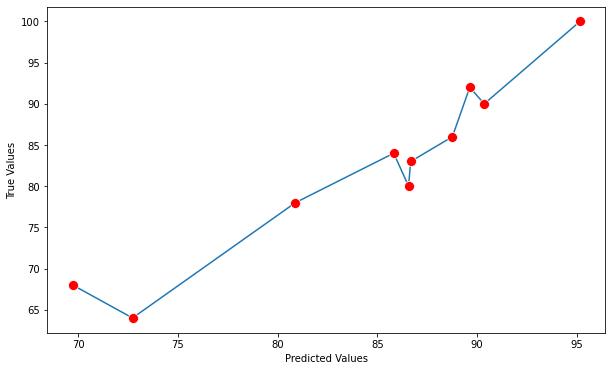

In [47]:
#Plot a graph showing how close are predicted and True Values
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,6))
sns.lineplot(x='Predicted Values',y='True Values',data=predict_df,ax=ax,marker='o',markerfacecolor='red',markersize=10)
#sns.lineplot(x='True Values',y=predict_df.index,data=predict_df,ax=ax,label='True Values')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values')
plt.show()
#This is how we would like to see our graph (Linear)

# Model Saving

In [ ]:
joblib.dump(model,'baseball_Ridge.obj')